# Plots Solution from ILOG

See ilog_sol_size.mod

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt

plt.style.use('bmh')

In [2]:
def get_main_room():
    main_room = pd.read_excel("data/main_room.xlsx", header=None, index_col=0)
    dx, dy = main_room.loc["length", 1], main_room.loc["width", 1]

    return [(np.array([0, dx, dx, 0, 0]), np.array([0, 0, dy, dy, 0]))]
#[[(0, 0), (dx, 0), (dx, dy),  (0, dy)]]

In [3]:
def get_rooms(p):
    rooms = pd.read_excel("data/sol_lin_sizes.xlsx")
    for i in range(1, rooms.room.max() + 1):
        _df =  rooms.query(f"room=={i}")
        x = _df.x.values
        y = _df.y.values
        
        p.append((np.append(x, x[0]), np.append(y, y[0])))
        #print(np.append(x, x[0]), y + [y[0]])

    #print(p)
    return p

In [4]:
lines = get_main_room()
lines = get_rooms(lines)

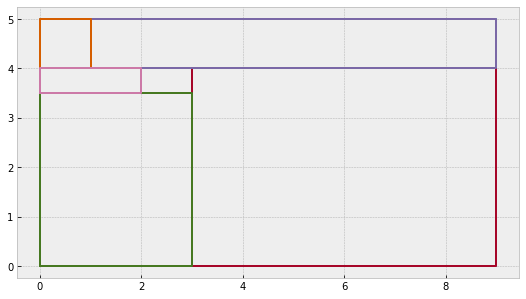

In [5]:
plt.figure(figsize=(9, 5))
for x, y in lines:
    plt.plot(x, y, "-")

plt.show()